In [1]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

# warning(경고) 안보이게
import warnings
warnings.filterwarnings(action='ignore') # 경고메세지 안보이게

# 시각화의 선명도를 높임
%config InlineBackend.figure_format = 'retina'

# 한글설정
plt.rc('font', family='Malgun Gothic') # 윈도우즈
plt.rc('axes', unicode_minus=False) # 축의 - 깨짐 방지

In [2]:
fish = pd.read_csv('data/어획_방류.csv')
fish

시도   어종류    연도   월  어획량_마리  어획량_Kg     품종       방류량  방류구분
0     강원  가자미류  2022   7     0.0     0.0   강도다리   94783.0  매입방류
1     강원  가자미류  2022   7     0.0     0.0  문치가자미   92986.0  매입방류
2     강원  가자미류  2022   8     0.0     0.0   강도다리  137218.0  매입방류
3     강원  가자미류  2022   8     0.0     0.0   강도다리   34058.0  매입방류
4     강원  가자미류  2022   8     0.0     0.0   강도다리   35581.0  매입방류
...   ..   ...   ...  ..     ...     ...    ...       ...   ...
6632  충남    해삼  2024   6     0.0     0.0    미방류       0.0   미방류
6633  충남    해삼  2024   7     0.0     0.0    미방류       0.0   미방류
6634  충남    해삼  2024   8     0.0     0.0    미방류       0.0   미방류
6635  충남    해삼  2024   9     0.0     0.0    미방류       0.0   미방류
6636  충남    해삼  2024  10     0.0     0.0    미방류       0.0   미방류

[6637 rows x 9 columns]

In [3]:
fish_catch = fish.groupby('어종류')['어획량_마리'].mean()
fish_catch

어종류
가자미류         14299.195219
감성돔           5705.151408
갑오징어류        49612.120000
갯장어              6.777070
기타               3.371465
기타갑각류           39.735294
기타돔류          3872.968326
기타볼락류        19296.184211
기타어류           707.369420
기타조기류            0.000000
꼼치류              0.185185
꽃게               3.389262
낙지류            753.240223
넙치류(광어)       1993.321033
노래미류             0.000000
농어류            894.634615
능성어             17.662338
대구            2024.604317
돌돔(줄돔)         717.099548
문어류          23490.691919
민꽃게              0.285714
민어             423.765766
복어류            206.224670
송어류              0.200000
전어             364.666667
조피볼락(우럭)     10278.050000
주꾸미         376694.277512
쥐치류            174.855422
참돔            3982.369565
참조기              3.377358
해삼               2.479058
Name: 어획량_마리, dtype: float64

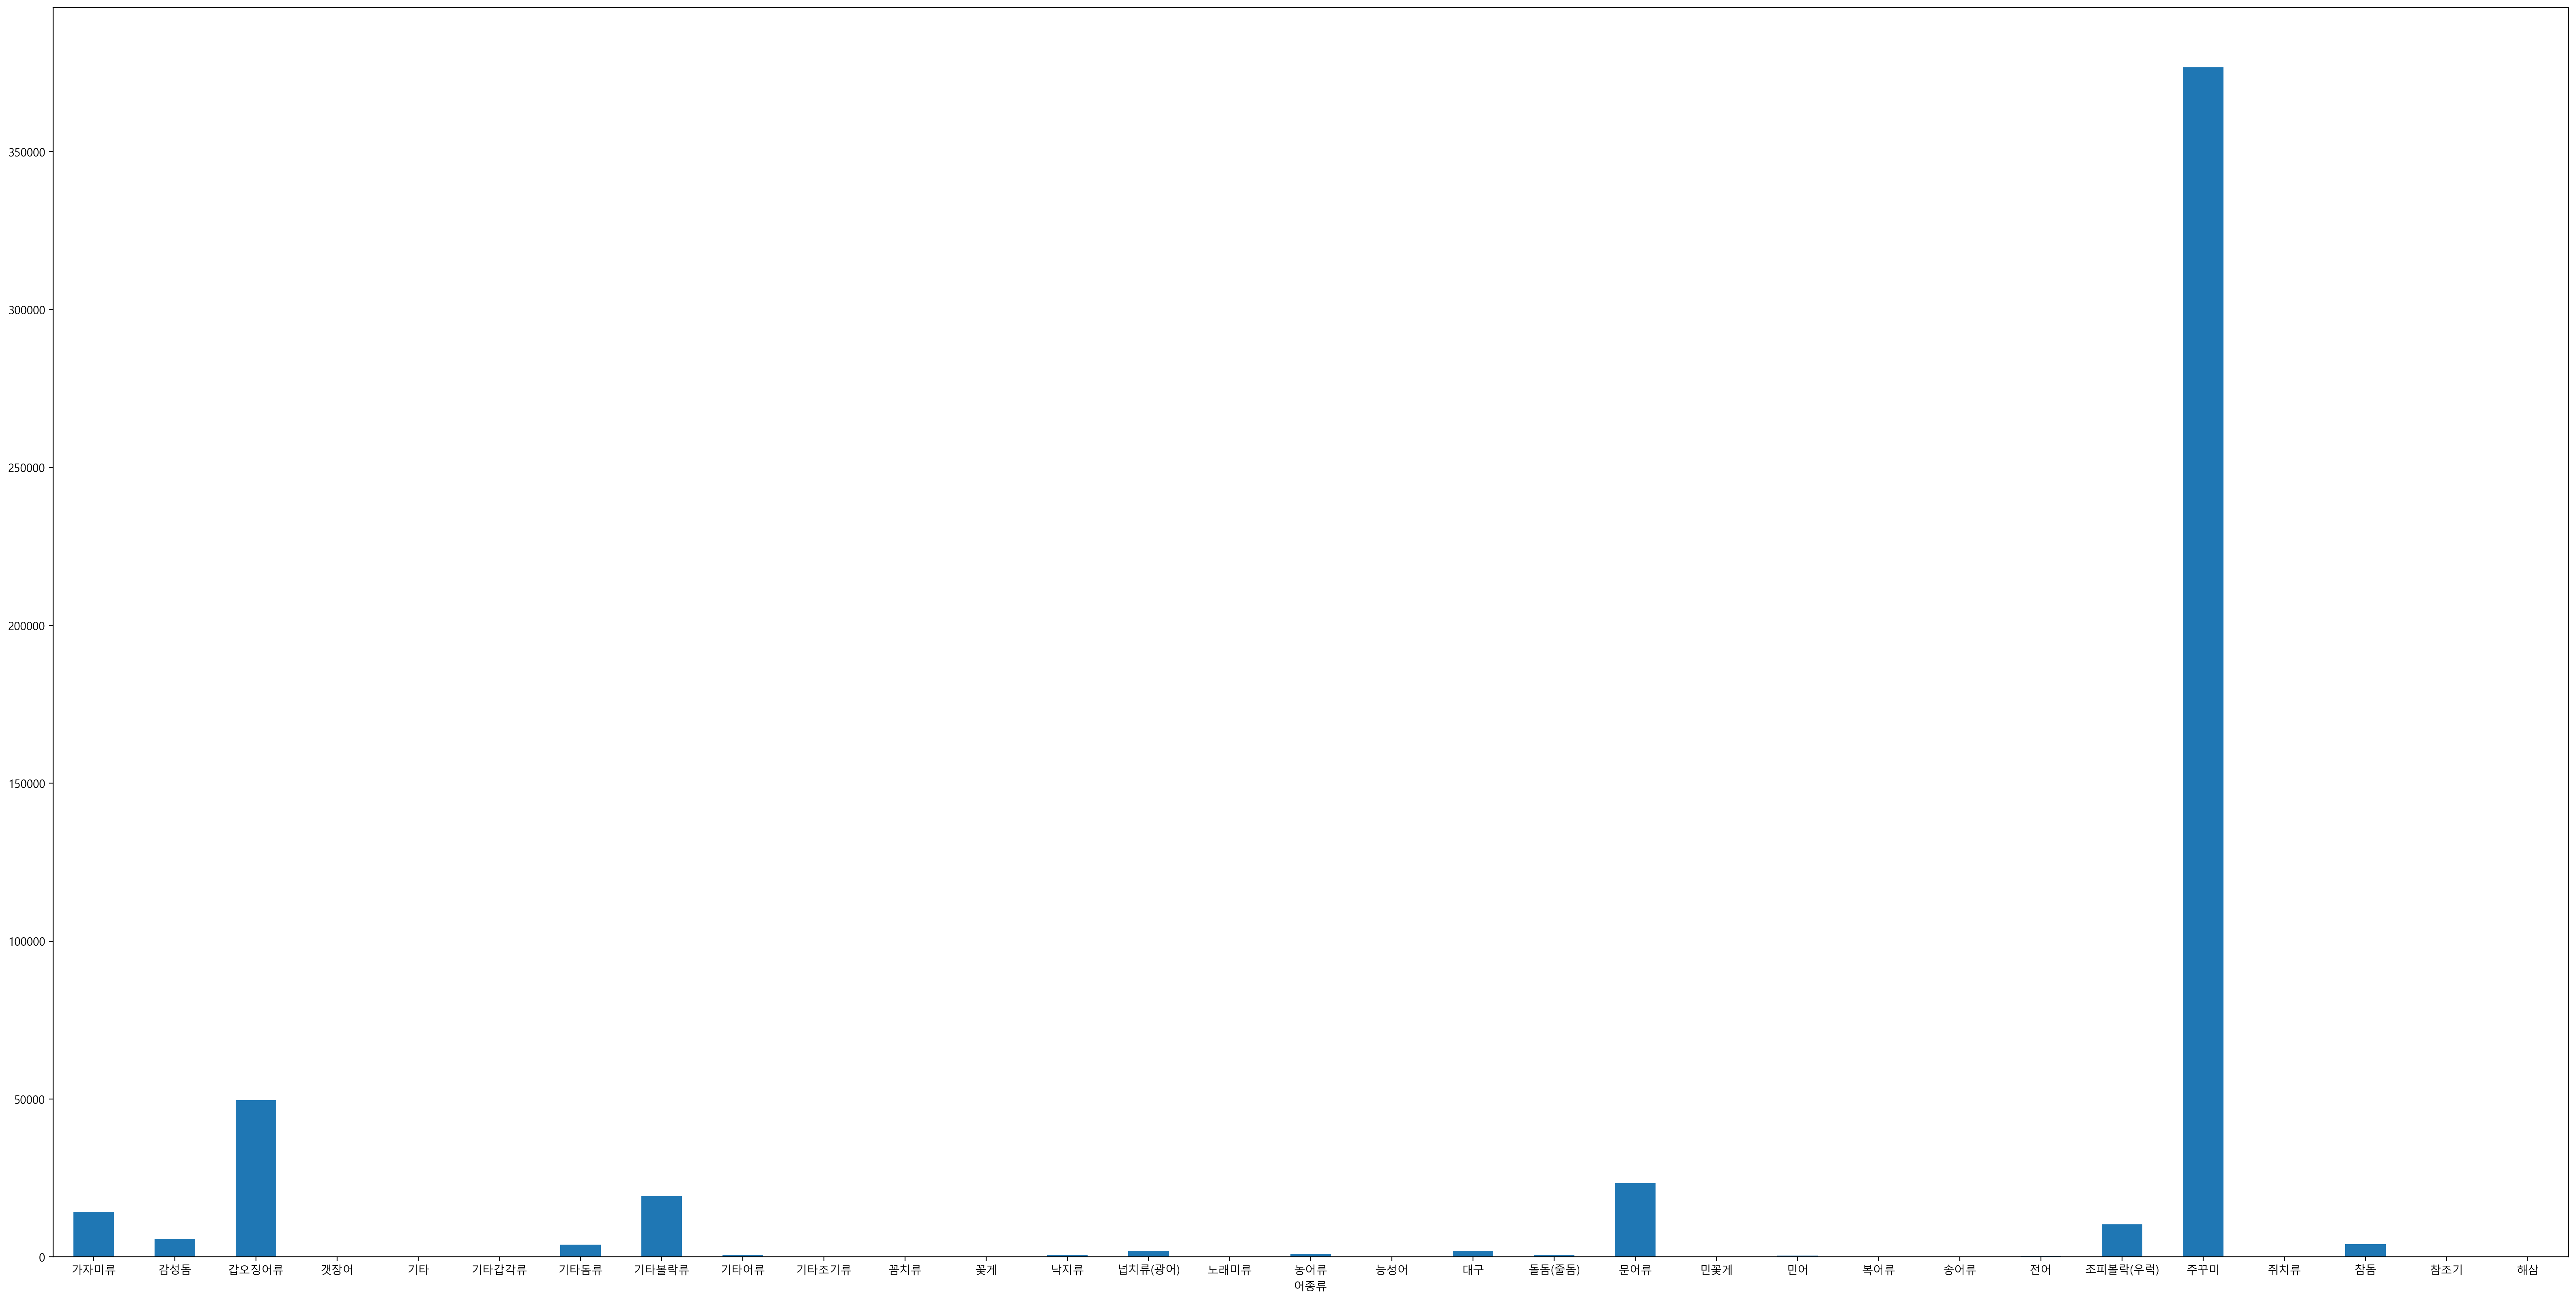

In [4]:
fish_catch.plot(kind='bar',
              figsize=(40,20),
              rot=0)
plt.show()

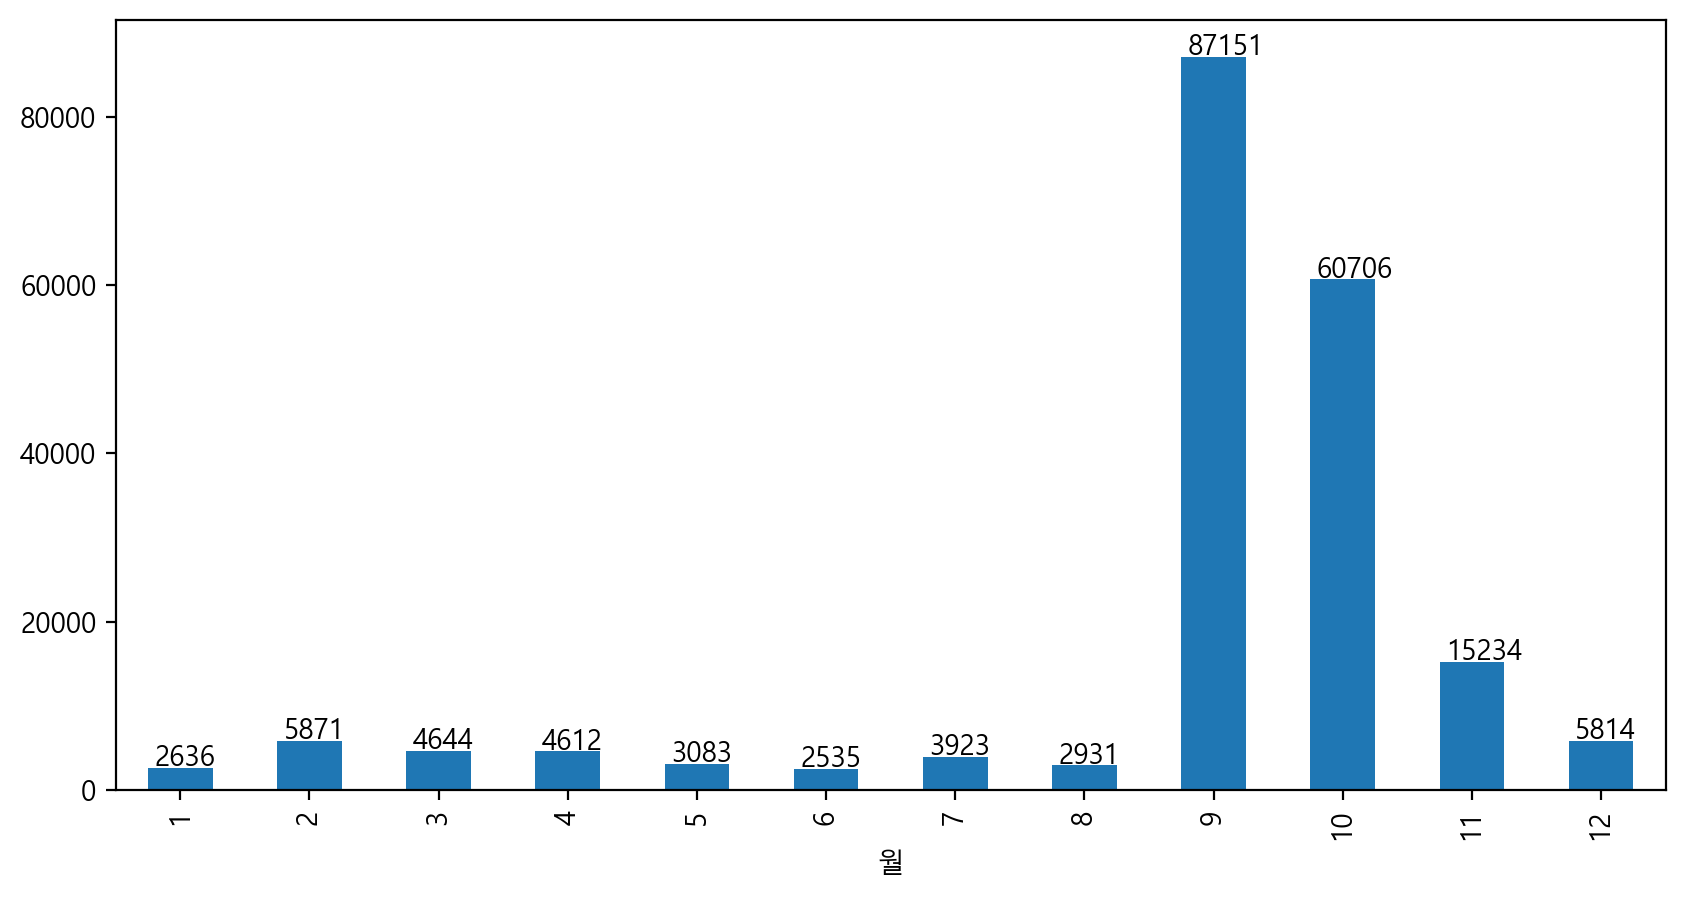

In [5]:
fish_ = fish.groupby('월')['어획량_마리'].mean()
fish_.plot.bar(figsize=(10,5))
for i, val in zip(fish_.index, fish_):
    plt.text(i-1.2, val+200, round(val))
plt.show()

In [6]:
result = fish.pivot_table(index='월', columns='연도', values='어획량_마리')
result

연도  2022           2023           2024
월                                     
1    0.0    2559.635879    5104.404040
2    0.0    5489.815920    6376.292929
3    0.0    3549.631818    6727.606061
4    0.0    3204.600000    7212.848485
5    0.0    2826.657040    5373.429293
6    0.0    3365.662021    4405.191919
7    0.0    4999.624521    6268.681818
8    0.0    2796.108753    5243.954545
9    0.0  119381.478571  115960.378788
10   0.0   67400.093284   72800.015152
11   0.0   18395.183962            NaN
12   0.0    7067.733945            NaN

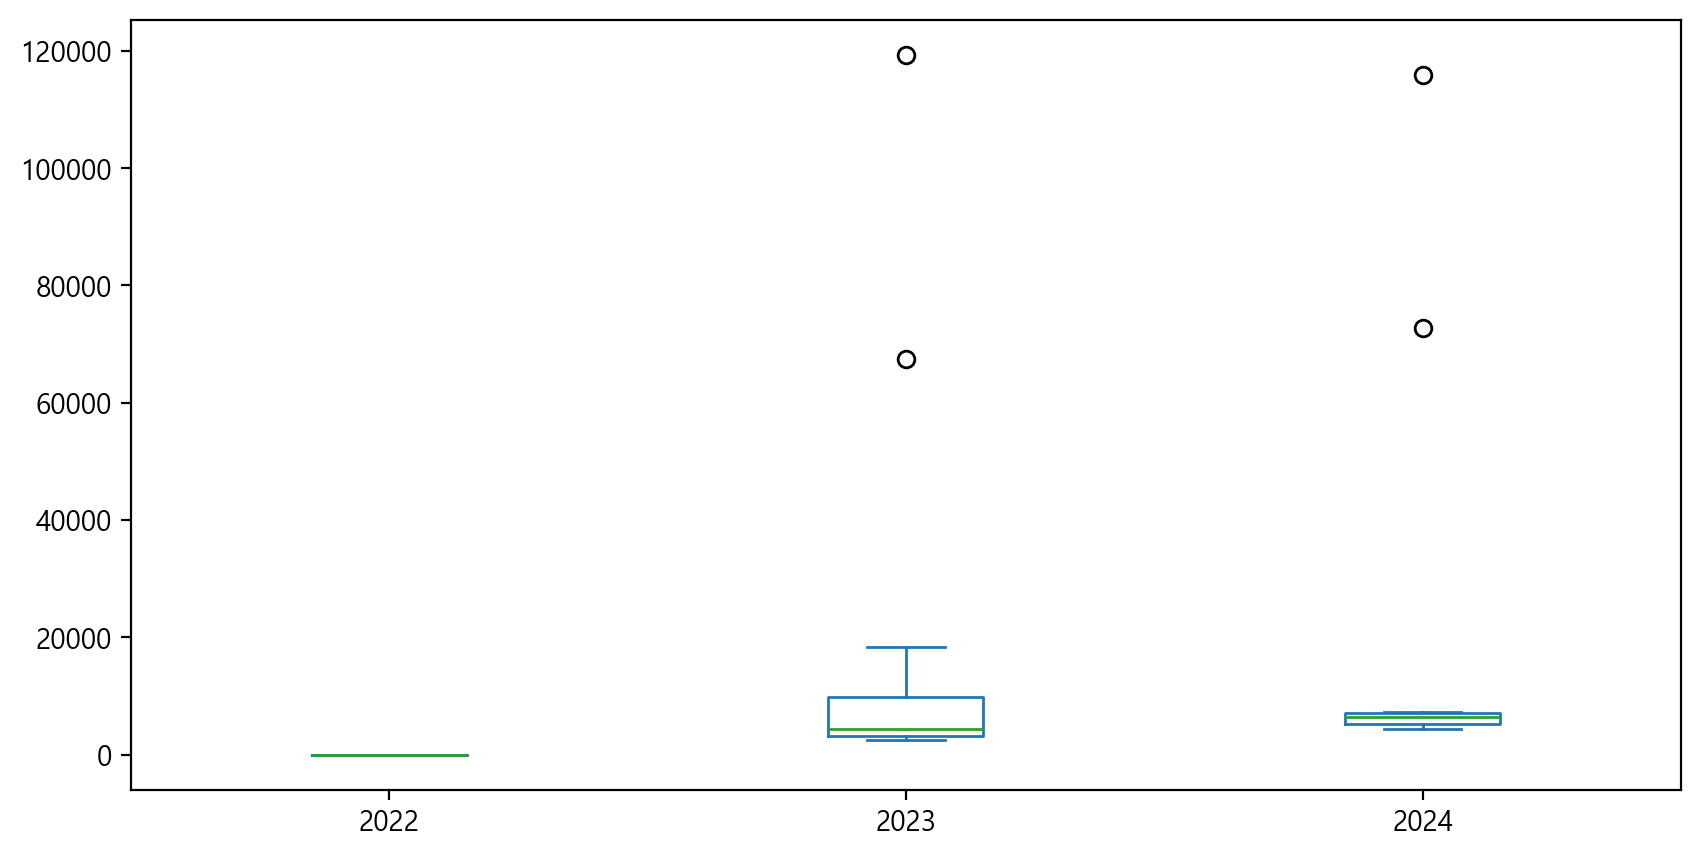

In [7]:
result.plot.box(figsize=(10,5))
plt.show()

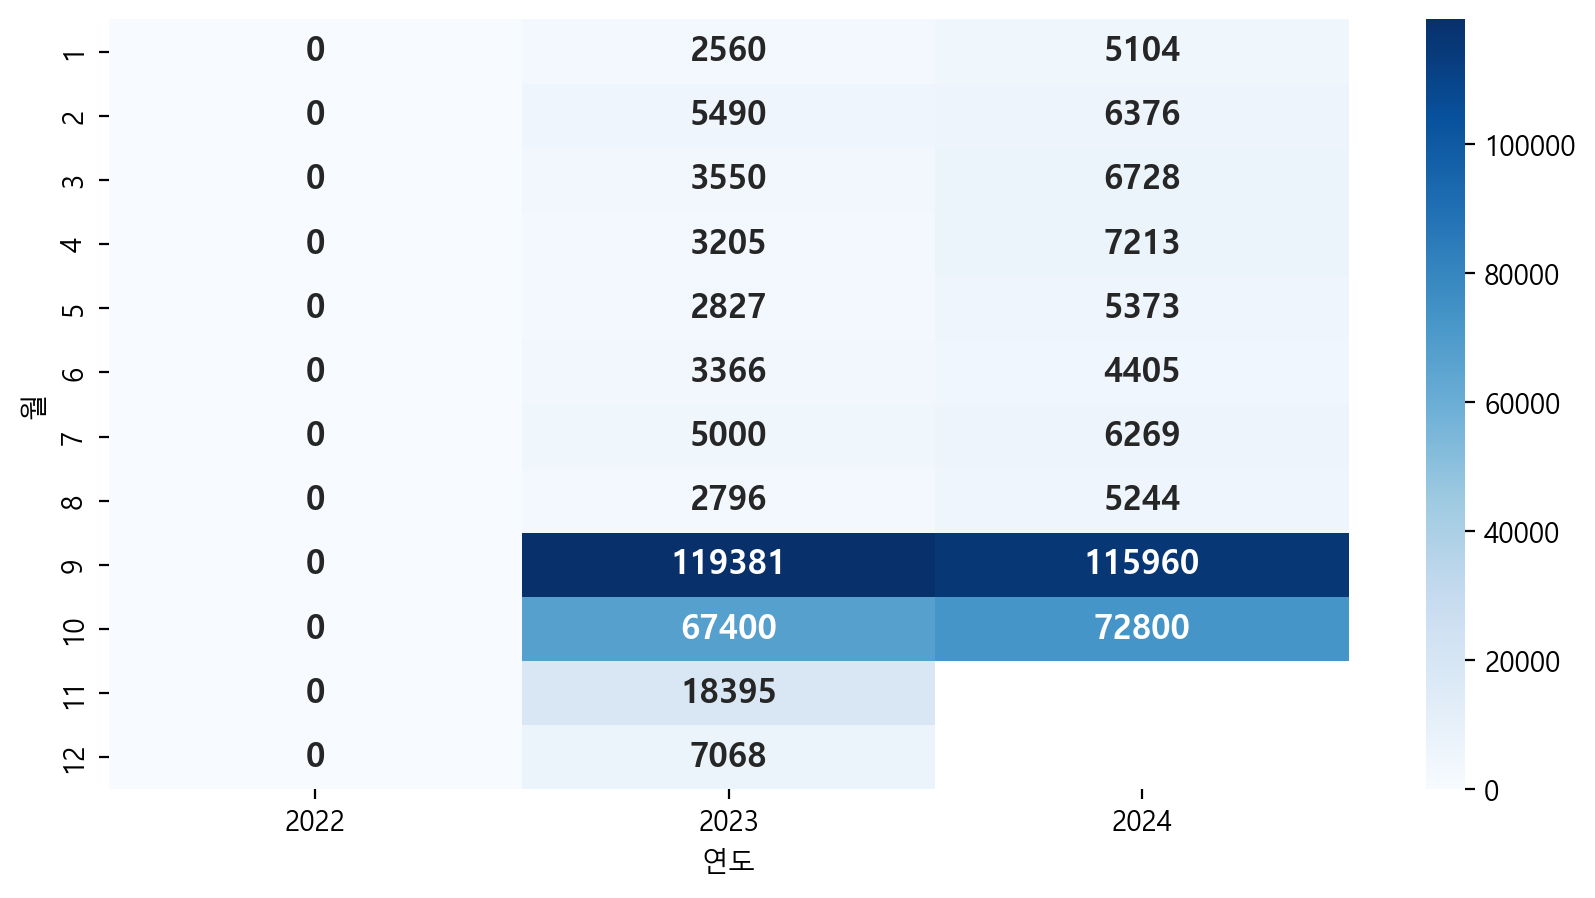

In [8]:
plt.figure(figsize=(10,5))
sns.heatmap(result,
           cmap='Blues',
           annot=True,
           fmt='.0f',
           annot_kws={'weight':'bold','size':12})
plt.show()

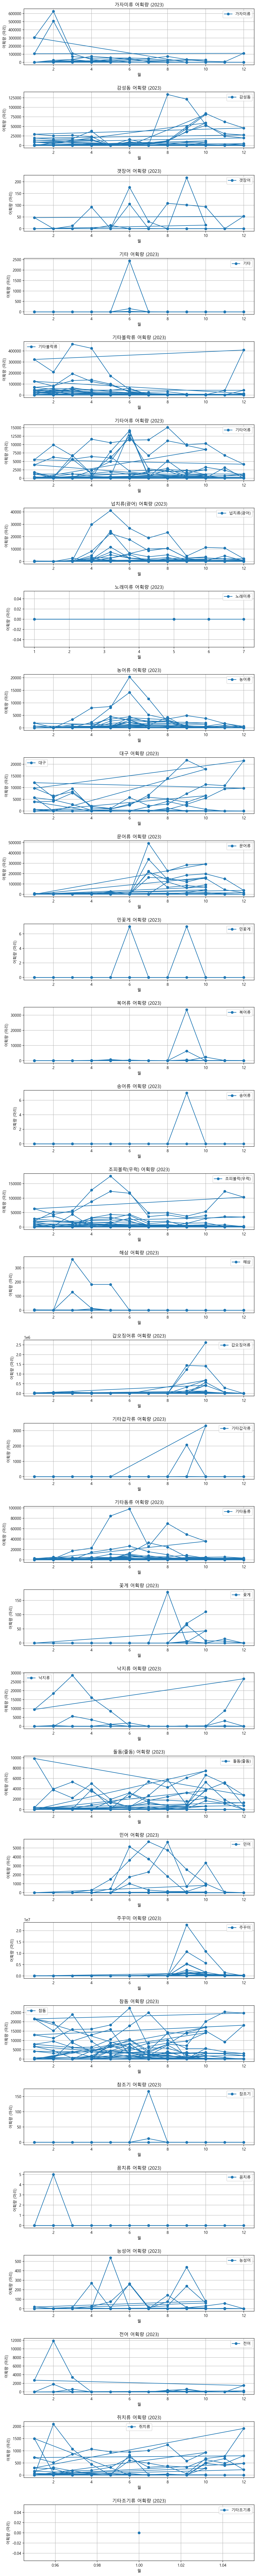

In [13]:
import matplotlib.pyplot as plt

# 품종 리스트 추출
species_list = fish['어종류'].unique()

# 그래프 설정
fig, axes = plt.subplots(nrows=len(species_list), ncols=1, figsize=(10, len(species_list) * 3))
fig.tight_layout(pad=5.0)

# 각 품종별 그래프 생성
for ax, species in zip(axes, species_list):
    species_data = fish[fish['어종류'] == species]
    ax.plot(species_data['월'], species_data['어획량_마리'], marker='o', label=species)
    ax.set_title(f"{species} 어획량 (2023)")
    ax.set_xlabel("월")
    ax.set_ylabel("어획량 (마리)")
    ax.grid(True)
    ax.legend()

# 그래프 출력
plt.show()
